## Final Project Submission

Please fill out:
* Student name: Miya Kusumoto
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Eli Thomas

In [1]:
#import statements

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.basemap import Basemap

from scipy.stats import kurtosis
from scipy.stats import skew

import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Obtain

Let's begin by importing our dataset, checking to make sure it was imported correctly.

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Our data looks like it was imported properly. Let's take a look at the column descriptions we were provided with and get a good foundation of what we are working with. 
* id - unique identified for a house
* dateDate - house was sold
* pricePrice - is prediction target
* bedroomsNumber - of Bedrooms/House
* bathroomsNumber - of bathrooms/bedrooms
* sqft_livingsquare - footage of the home
* sqft_lotsquare - footage of the lot
* floorsTotal - floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 - lotSize area in 2015 (implies-- some renovations)


# Scrubbing our Data

Let's see where we need to clean it up. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Well, at first glance it seems that the only columns that have null values are waterfront, view, and yr_renovated. I imagine there are likely some columns that have hidden NaN values and columns we need to update the datatype for.

Once I clean up null values and check/update datatypes, I will check for multicollinearity, normalize the data, and one-hot encode my categorical columns. 

Let's take a look at our low hanging fruit columns firt: Waterfront, view, and yr_renovated. Each of these have obvious missiong values.

## Waterfront


In [4]:
#check how many NAN values are in the Waterfront column
df["waterfront"].isna().sum()

2376

In [5]:
#print unique values in the waterfront columns
df["waterfront"].unique()

array([nan,  0.,  1.])

In [6]:
#print the value counts of waterfront column
df["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

We have 2376 null values. Out of our 21000+ values it is probably ok to drop these rows. Perhaps we could also assume that majority of these properties with null values do not have a waterfront view (look at those value counts!). 

Going to go ahead and reclassify the null values as 0 and also going to change this column to categorical.


In [7]:
#replace NAN values with 0.
df["waterfront"].fillna(0.0, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
#change type from int to string
df["waterfront"] = df["waterfront"].astype("str")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


Great! We fixed the waterfront variable. Next let's look at view. We will repeat the same process.

## View

In [10]:
df["view"].isna().sum()

63

In [11]:
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [12]:
df["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Ok so there are only 63 null values. Let's just convert them to 0s. It looks like the max number of times a property has been viewed is 4 and that a vast majority of properties haven't yet been viewed. 

This variable may come in handy because it will help us to understand which properties are most popular. It could also shed some light on popular zipcodes or maybe even unpopular properties if they have been viewed many times but have remained on the market for an extended period of time. 

In [13]:
df["view"].fillna(0.0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


## yr_renovated, yr_built, and date

In [14]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [15]:
df["yr_renovated"].isna().sum()

3842

This is a tricky situation because we could assume that the 3842 null values are homes that have not been renovated. I can also take a quick look at the sqft_living and the sqft_living15 of those 3842 homes to see if that in fact is the case (the sqft_living15 column is the sqft of the living space in 2015 and implies some renovation.)

In [16]:
df_reno = df[df["yr_renovated"].isna()]
df_reno["dif15"] = df_reno["sqft_living15"] - df_reno["sqft_living"]
df_reno["dif15"].describe()

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    3842.000000
mean      -90.556741
std       610.035745
min     -5640.000000
25%      -320.000000
50%         0.000000
75%       220.000000
max      2270.000000
Name: dif15, dtype: float64

Recall that sqft_living is the square footage of the entire house. Sqft_living15 is the square footage of the living room in 2015. We should be able to assume that a difference between the two columns resulting in a positive value means that the house was likely renovated (becuase it got bigger). 

The descriptive statistics here are not incredibly helpful -- we can see the mean difference is negative and the UQR is 220 - 2270. For scrubbing purposes, we might as well drop the year_renovated column and rely on the sqft_living15 and sqft_lot15 for questions about renovation. 

In [17]:
#This would fill our null values with zeroes.
#df["yr_renovated"].fillna(0.0, inplace = True)

#this drops our year_renovated column
df = df.drop("yr_renovated", axis = 1)

Now I want to look into yr_built and date. Check for any placeholder values and convert the column into a date object.

In [18]:
df["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

All the years here look good. I want to convert this into a date object. 

In [19]:
#preview my results first. I have to explicitly pass a format string.
pd.to_datetime(df["yr_built"], format = "%Y").head()

0   1955-01-01
1   1951-01-01
2   1933-01-01
3   1965-01-01
4   1987-01-01
Name: yr_built, dtype: datetime64[ns]

In [20]:
df["yr_built"]=pd.to_datetime(df["yr_built"], format = "%Y")
print(df["yr_built"].dtype)

datetime64[ns]


Doing the same thing for the date sold, I want to look at the dates and then convert into date objects.

In [21]:
#preview results first
pd.to_datetime(df["date"]).head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [22]:
df["date"] = pd.to_datetime(df["date"])

In [23]:
df.info()
#need to update sqft_basement, floors, condition, grade, and zipcode datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null datetime64[ns]
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(10), object(2)
memory usage: 3.3+ MB


## sqft_living, sqft_lot, sqft_above, sqft_basement

In my sqft columns, I want to check for hidden placeholder values and cast the datatypes correctly. In the column descriptions, I was told that the sqft_living is the total square footage of the house, the sqft_lot is the total square footage of the lot. 

I need to check whether sqft_living15 and sqft_lot15 are correctly described in this document because these columns potentially could be the square footage of the living room and the lot in 2015 respectively. 

In [24]:
#sqft_basement should be an int. But after looking at the unique values there is a hidden null value... the '?'
df["sqft_basement"].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [25]:
df["sqft_basement"].value_counts()
#454 with the ?. Replacing these with 0s. I will assume that these houses do not have basements.

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
2180.0        1
2250.0        1
1284.0        1
1008.0        1
1548.0        1
2490.0        1
666.0         1
274.0         1
2720.0        1
2300.0        1
2570.0        1
1481.0        1
3500.0        1
475.0         1
2500.0        1
1281.0        1
2050.0        1
1248.0        1
143.0         1
1024.0        1
2850.0        1
768.0         1
1798.0        1
518.0         1
1930.0        1
415.0         1
652.0         1
1913.0        1
243.0         1
1960.0        1
Name: sqft_basement, Len

In [25]:
df["sqft_basement"] = df["sqft_basement"].replace("?", 0)

In [26]:
#cast sqft_basement as a float
df["sqft_basement"] = df["sqft_basement"].astype("float32")

In [27]:
df["sqft_living"].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [28]:
#There are so many values that it is hard to see about placeholder values. I will describe so I can easily see. 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.716583,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.819855,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


sqft_lot15 and sqft_living both look like they have some outliers. I just want to quickly visualize with a boxplot.

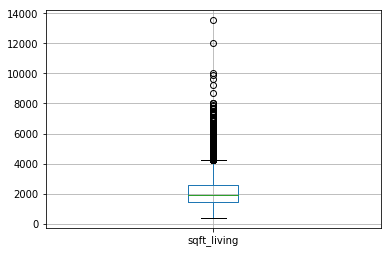

In [29]:
boxplot = df.boxplot(column ="sqft_living" )
#ok, there are a lot of outliers but this probably justifies keeping them around. 

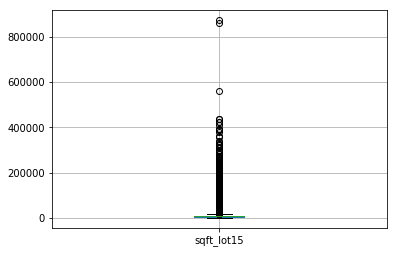

In [30]:
boxplot = df.boxplot(column ="sqft_lot15" )

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float32
yr_built         21597 non-null datetime64[ns]
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](2), float32(1), float64(6), int64(10), object(1)
memory usage: 3.2+ MB


In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.716583,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.819855,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## bedrooms and bathrooms
Next need to check out my bedrooms variable because 33 bedrooms could possibly be a placeholder value. Also want to look into the 8 bathrooms. I will verify this by checking for significant outliers.

In [33]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

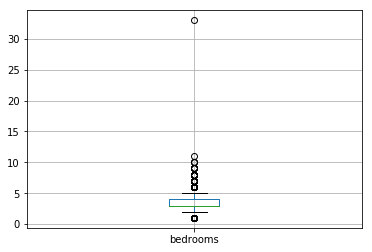

In [34]:
boxplot = df.boxplot(column ="bedrooms" )

In [35]:
#drop the house with 33 bedrooms. That seems to be a placeholder. 
df.drop(df[df.bedrooms == 33].index, inplace=True)

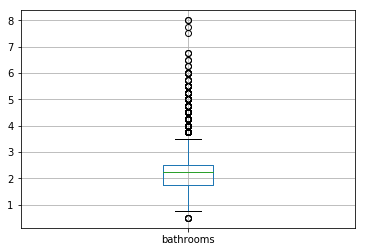

In [36]:
boxplot = df.boxplot(column ="bathrooms" )
#dont drop. 8 bathrooms still looks reasonable.

## Zipcode 
I need to convert the zipcode into a categorical column. 


In [37]:
df["zipcode"] = df["zipcode"].astype("str")

## Condition, grade, and floors 

I need to examine these three columns to make sure that there are no placeholder values and also update them into categorical columns.

In [38]:
df["condition"].unique()

array([3, 5, 4, 1, 2])

In [39]:
df["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [40]:
df["floors"].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

They all seem to be fine. I will now convert all of them into categorical variables.

In [41]:
categorical = ["condition", "grade", "floors"]

for item in categorical:
    df[item]=df[item].astype("str")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
id               21596 non-null int64
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null object
waterfront       21596 non-null object
view             21596 non-null float64
condition        21596 non-null object
grade            21596 non-null object
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float32
yr_built         21596 non-null datetime64[ns]
zipcode          21596 non-null object
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: datetime64[ns](2), float32(1), float64(5), int64(7), object(5)
memory usage: 3.4+ MB


Great! All columns seem to be converted to the correct data type and all have been checked for missing values. Before I one-hot encode all of my categorical variables, I want to start doing some basic exploration.


# Exploring

There are several questions I wish to answer during this stage:
 - Do waterfront properties have higher list prices or more views than non-waterfront properties?
 - Is there a seasonality to selling houses? What time of year are most houses sold? On a macro level, is it a good year to sell my house? Have the prices been trending up?
 - Do basements matter in list prices?
 - What zipcodes are the most sought after? Which zipcodes have the highest average price?

## How does price vary for waterfront vs non-waterfront properties?

It is important to understand how the property's attributes affect the sale price of the home. Does it matter if a home is waterfront?

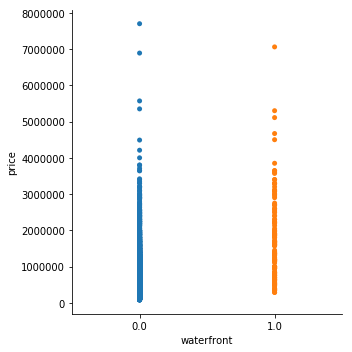

In [42]:
sns.catplot(x="waterfront", y="price", jitter = False, data=df);

In [43]:
import matplotlib.image as mpimg

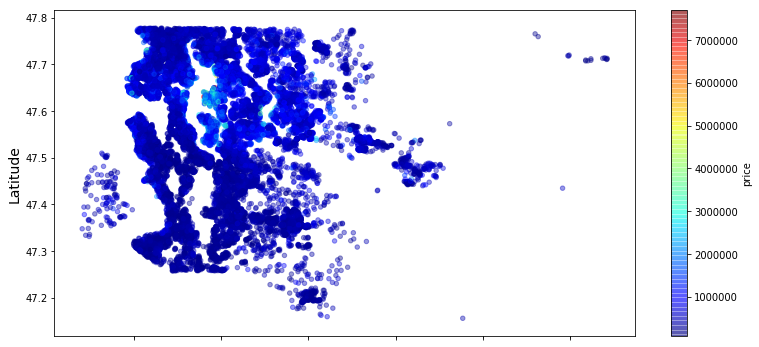

In [44]:
kingcounty_img=mpimg.imread('king_county.png')

df.plot(kind="scatter", x="long", y="lat",c="price",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(13, 6),)
#plt.imshow(kingcounty_img, extent=[-122.6, -121.5, 47.1, 47.8], alpha=0.5)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

It doesn't appear that a waterfront property would have a significantly higher property value. In fact, the highest priced houses are non waterfront properties. 

However when we look at the map, we can see that the higher value homes do seem to be concentrated around very specific bodies of water. This leads me to belive that only specific waterfront properties are more profitable than others. Rather than looking at whether a home is on the water, a better measure may be to look at the desirability of the zipcode.



## When should you sell? Is there a seasonality to housing prices? How about general value trends?

Next, I want to understand if a certain month is better for housing prices than the rest. When do you see higher value properties? How about lower value? 

I also want to understand how selling prices have fluctuated over the years. Are home values trending up or should sellers hold onto their property? 

Finally I want to see housing price trends based on year built. Are older homes worth more? Is there a pattern to understanding when historic homes are more popular than new constructions?

In [45]:
df["yearSold"], df["monthSold"] = df["date"].dt.year, df["date"].dt.month
df["month_year"] = df["date"].dt.to_period("M")

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Price')

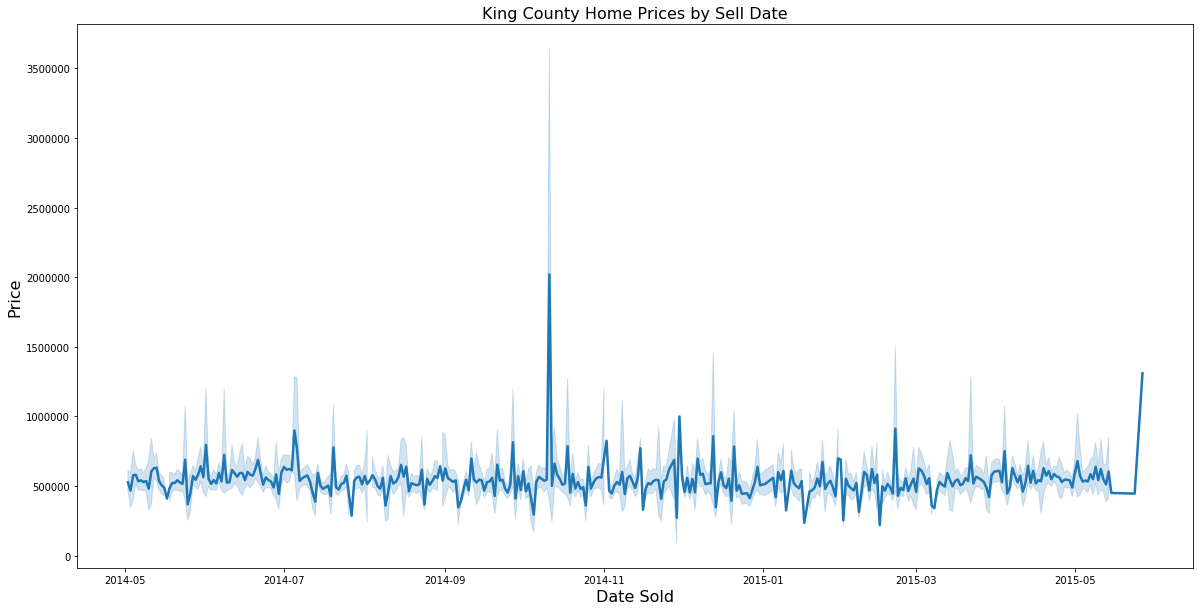

In [46]:
plt.figure(figsize = (20, 10))
sns.lineplot(x="date",y="price", data = df, palette="tab10", linewidth=2.5);

plt.title('King County Home Prices by Sell Date', fontsize = 16)
plt.xlabel('Date Sold', fontsize = 16)
plt.ylabel('Price', fontsize = 16)


This doesn't shed too much light on whether or not it is a good time to sell. It even looks like sell prices have been reasonably consistent for Q2 of 2015. Now I want to see if the months tell a different story. Perhaps there is a consistent trend by month YoY.

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


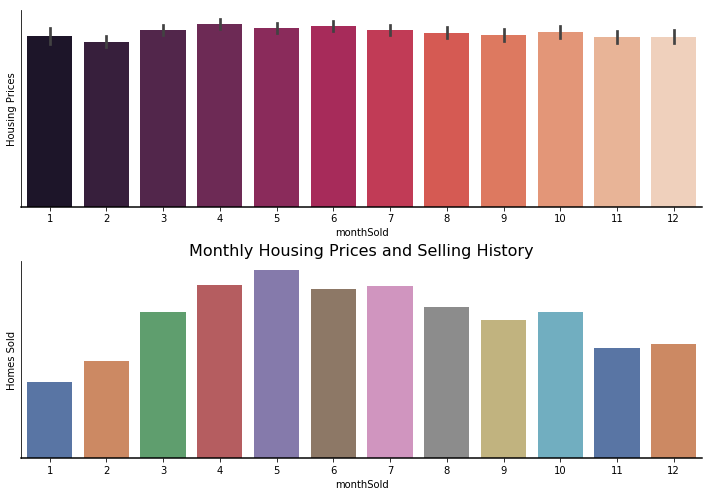

In [47]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

#Subplot 1 with housing prices by month
sns.barplot(x="monthSold", y="price",data=df, palette="rocket", ax=ax1);
ax1.set_ylabel("Housing Prices")
ax1.axhline(0, color="k", clip_on=False)

#Subplot 2 with number of homes sold by month
sns.countplot(x="monthSold",data=df, palette="deep", ax=ax2);
ax2.set_ylabel("Homes Sold")
ax2.axhline(0, color="k", clip_on=False)

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.xticks(rotation = 0)
plt.title('Monthly Housing Prices and Selling History', fontsize = 16);

Again there isn't too much fluctutation in sell prices by month but the number of homes sold by month defintely looks to fluctuate. 

April, May, June, and July are the months where the highest number of homes are sold. It is recommended that sellers put their homes on the market in Q2 -- this allows ample time to sell their house and the house will likely sell at a slightly higher price. 

If a seller puts their home on the market around the holidays (Q4/Q1), they will likely have to drop the price down a bit to be competitive with the market.

Now I want to look at the prices of historic homes and the quantity of these older homes that sell.


/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


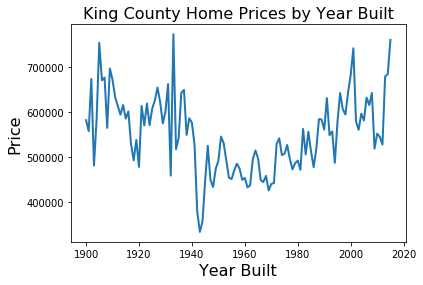

In [48]:
sns.lineplot(x="yr_built", y="price",data=df, err_style = None, palette="rocket", linewidth=2);

plt.title("King County Home Prices by Year Built", fontsize = 16)
plt.xlabel("Year Built", fontsize = 16)
plt.ylabel("Price", fontsize = 16);

The figure above shows that the homes built in the 40s have a lower value than average. This could be for many reasons -- perhaps the homes built in that year were smaller on average or they were in a less than ideal zipcode. All we can say for sure is that there is a drop in housing price for homes built in the 40s. 

Similarly there are spikes in housing price for homes built in the early 1900s, the 1930s, in 2000, and new construction (in 2015). There are likely different reasons for these spikes (new construction, home size during those times, lot size during those times, etc.)

This is relatively inconclusive but definitely good insight into how the year a home was built affects home price. 

## Do basements matter in home prices? How does square footage affect the price?
Now I want to understand how square footage affects the selling price of a house. Additionally, do basements significantly affect the price?

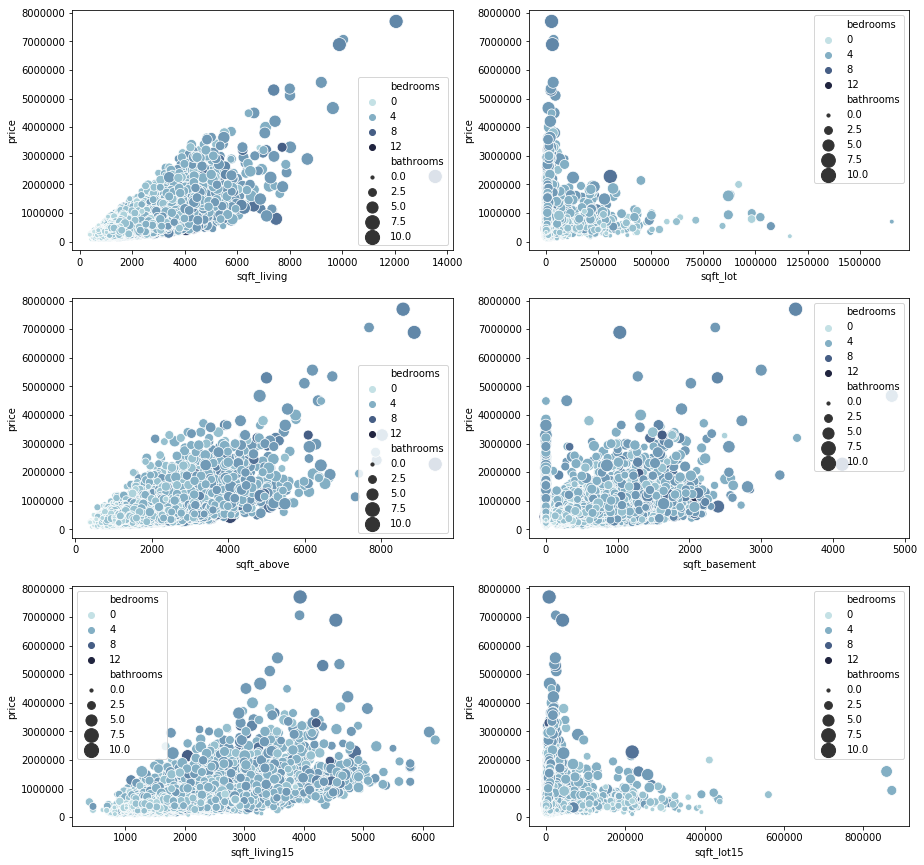

In [49]:
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)


ax1 = sns.scatterplot(x="sqft_living", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,0]);
ax1.set_xlabel("sqft_living")

sns.scatterplot(x="sqft_lot", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,1]);

sns.scatterplot(x="sqft_above", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,0]);

sns.scatterplot(x="sqft_basement", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,1]);

sns.scatterplot(x="sqft_living15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,0]);

sns.scatterplot(x="sqft_lot15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,1]);

Here we can see the positive correlations between sqft_living, sqft_above, and sqft_living15. This means that as houses get bigger, they do have higher prices. 

Between 2000 and 6000 in sqft_living the prices seem to be relatively spread out. This signals to me that there is a high likelihood that there are other factors that affect the house price -- potentially zip code? Or maybe the year built like we saw above. 

The lot size looks to have a very weak negative relationship with the home price. What's interesting is that properties with the largest lot sizes do not sell for much higher than those that are on smaller lots. THis could show that houses that sit on a larger piece of land might be a bit smaller (check out the bedrooms and bathroom number), might be dated, and are likely farther from city center. 

Next I want to look at zipcodes and distribution.

## How does zipcode affect housing prices?
What zipcodes are the most sought after? Which zipcodes have the highest average price and the nicest (by grade) houses?

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


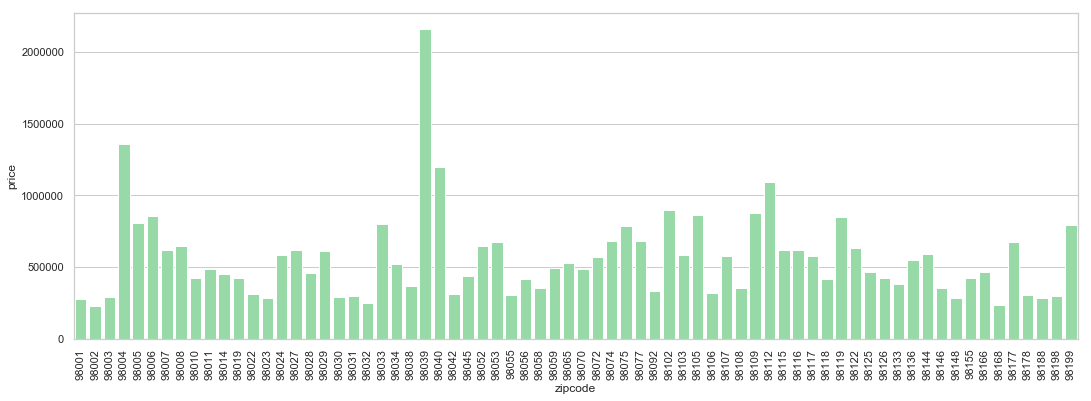

In [50]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(18, 6))

sns.set_color_codes("pastel")
sns.barplot(x="zipcode", y="price", ci = False, data=df, color="g");

plt.xticks(rotation = 90);


This is helpful to begin to see the variation of housing prices by zipcodes. The 98039, 98040, 98004, and 98112 zipcodes are significantly more expesive than the other zip codes in King County. It so happens that these zip codes are all in the same Bellevue area of King County.

## Exploring the most expensive King County Zip Codes



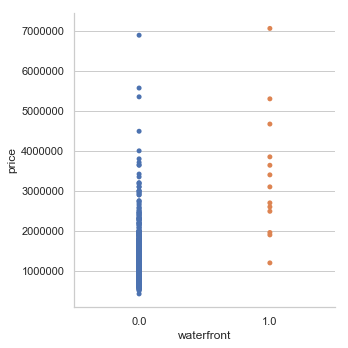

In [51]:
df_bellevue= df.loc[(df["zipcode"]=="98004")|(df["zipcode"]=="98039")|(df["zipcode"]=="98040")]

sns.catplot(x="waterfront", y="price", jitter = False, data=df_bellevue);

In [52]:
df_bellevue["waterfront"].value_counts()

0.0    636
1.0     13
Name: waterfront, dtype: int64

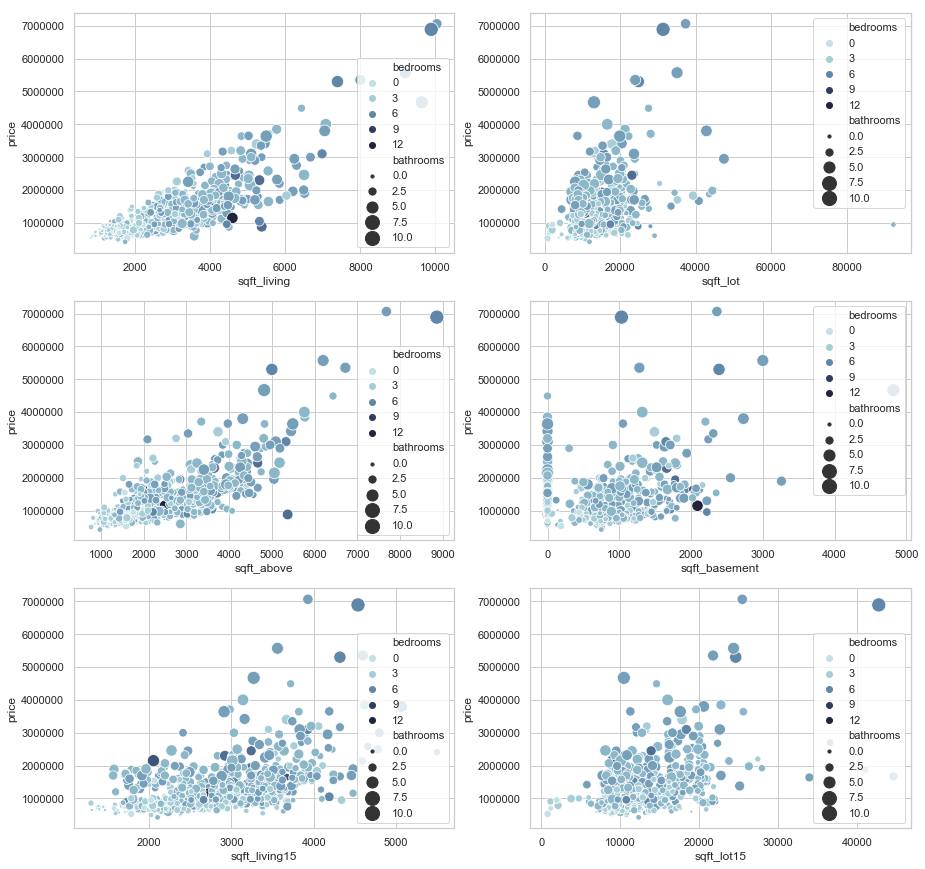

In [53]:
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)


ax1 = sns.scatterplot(x="sqft_living", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df_bellevue, ax = axes[0,0]);
ax1.set_xlabel("sqft_living")

sns.scatterplot(x="sqft_lot", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df_bellevue, ax = axes[0,1]);

sns.scatterplot(x="sqft_above", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df_bellevue, ax = axes[1,0]);

sns.scatterplot(x="sqft_basement", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df_bellevue, ax = axes[1,1]);

sns.scatterplot(x="sqft_living15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df_bellevue, ax = axes[2,0]);

sns.scatterplot(x="sqft_lot15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df_bellevue, ax = axes[2,1]);

Interestingly, not many of the houses in Bellevue have a waterfront view (in fact only 2% do) this further reinforces my initial finding that waterfront isn't actually all that important. 

We see similar behavior in Bellevue as far as relationships between square footage, bedrooms, and bathrooms.


## How important is the Grade?
King County assigns a grade to each home on the market that quantifies many of the attributes included in a home selling price. How does the grade seem to relate to the price?

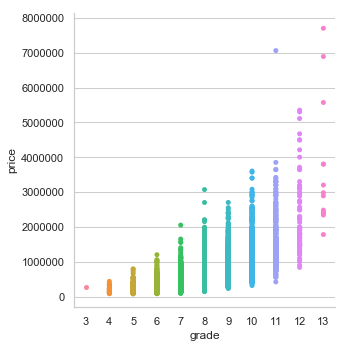

In [54]:
sns.catplot(x="grade", y="price", jitter = False, order = ["3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"],
            data=df);

It does seem that grade is important. Notice that any home with a price of >$300,000 has a grade of at least a 10. The large ranges for the higher grades show that there are other important attributes of home price as the homes get more expensive.

## Scrubbing: Checking for Multicollinearity

Before one-hot encoding our categorical variables, we want to check for multicollinearity. We want to make sure that the columns within the dataset are not highly correlated.

We'll do this by creating a correlation heatmap. We want to do this before one-hot-encoding our data because each column becomes both a row and a column in the visualization, and after one-hot encoding, this dataset will contain a lot of coulumns.



In [55]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

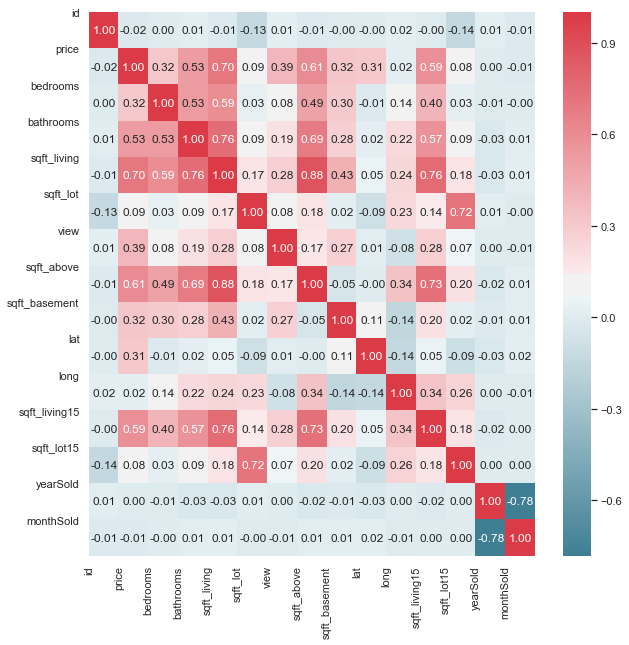

In [56]:
heatMap(df)

It does appear that there are some highly correlated variables. The sqft variables each seem to be highly correlated with each other. 

The highest correlations seem to be: 
 - sqft_living15 and sqft_living at .76
 - sqft_lot15 and sqft_lot at .72
 - grade and sqft_living at .76
 - sqft_above and sqft_living at .88
 
This makes sense becuase the sqft living is basically the sqft above and the sqft lots 15 and original all should be highly correlated.

I am going to drop my target variable price, the ID identifier, sqft_above, sqft_basement, sqft_living15, and sqft_lot15. I will also drop the year and month columns I added during exploration.

In [57]:
df = df.drop(["id", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yearSold", "monthSold", "month_year"], axis = 1)

## Normalizing our Data and One Hot Encoding
We normalize our dataset by converting each numeric value to it's corresponding z-score for the column, which is obtained by subtracting the column's mean and then dividing by the column's standard deviation for every value.

First I will take a look at the initial distributions of my numerical variables.

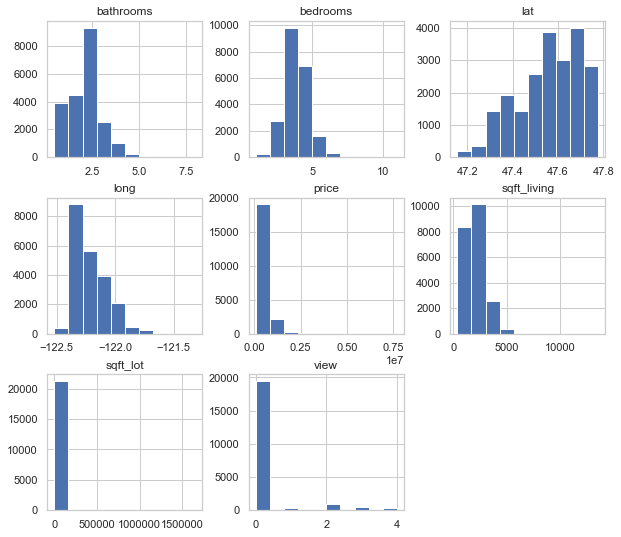

In [58]:
df.hist(figsize = (10,9));

In [59]:
df.describe().columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'lat', 'long'],
      dtype='object')

In [61]:
df.describe().columns
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'lat',
       'long'] :
    df[column] = (df[column] - df[column].mean()) / df[column].std()

In [62]:
#one hot encode categorical variables
df = pd.get_dummies(df)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,2014-10-13,221900.0,-0.411263,-1.451035,-0.980636,-0.228182,-0.304949,1955-01-01,-0.352842,-0.305724,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,538000.0,-0.411263,0.174457,0.533324,-0.189741,-0.304949,1951-01-01,1.161388,-0.746301,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,180000.0,-1.517318,-1.451035,-1.427199,-0.123144,-0.304949,1933-01-01,1.283364,-0.135178,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,0.694793,1.149752,-0.131075,-0.243877,-0.304949,1965-01-01,-0.283554,-1.272151,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,510000.0,-0.411263,-0.150642,-0.436046,-0.169506,-0.304949,1987-01-01,0.409325,1.200765,...,0,0,0,0,0,0,0,0,0,0


## Visualizing distributions, KDEs, and Probability Densities


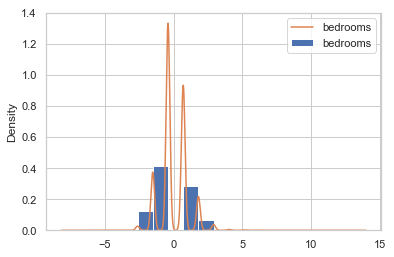

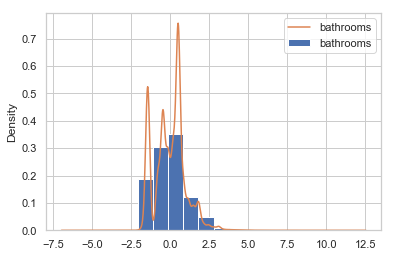

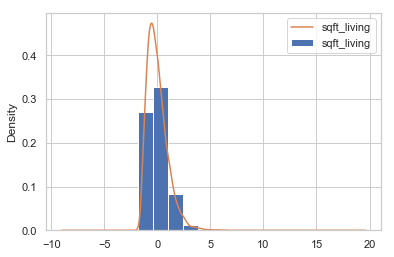

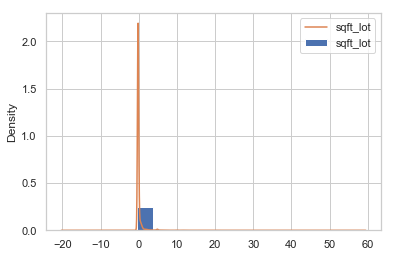

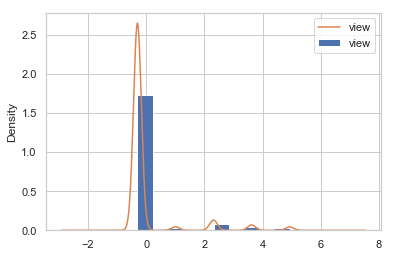

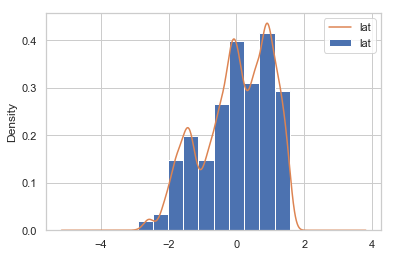

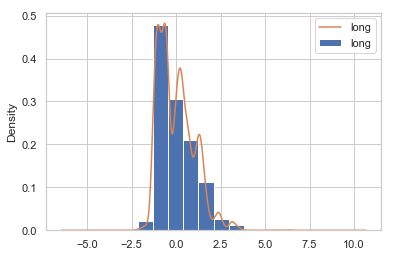

In [63]:
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'lat',
       'long']:
    df[column].plot.hist(density=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show();

A number of our data is multimodal meaning they have more than one typical value. We may need to generate separate plots while fine tuning the number of bins to view the data in a better way

## Build joint plots to check for the linearity assumption between predictors and target variable

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


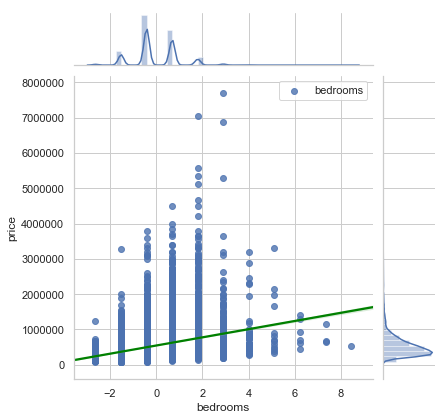

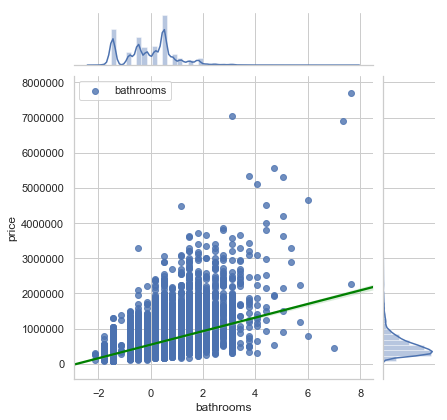

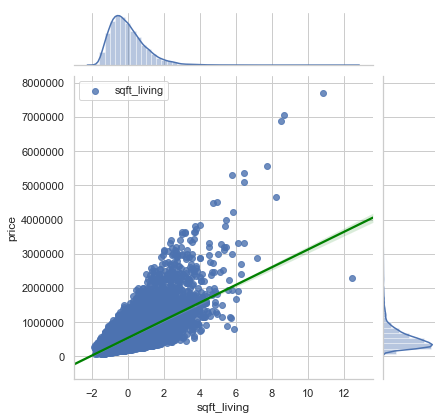

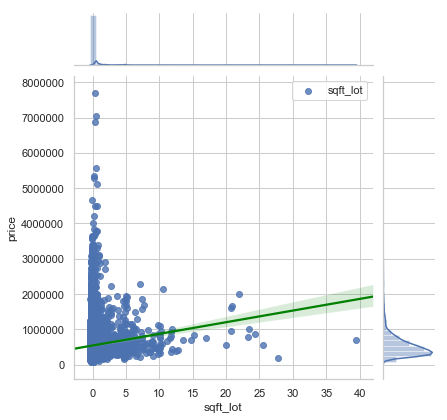

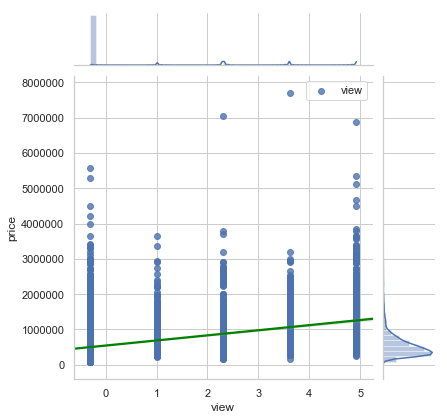

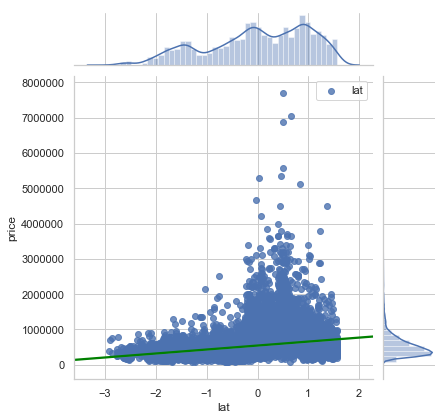

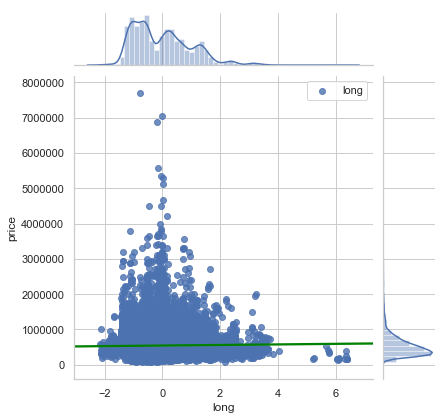

In [64]:
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'lat',
       'long']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show();

Bathrooms, Bedrooms, Sqft_living, and sqft_lot all seem to have a reasonably strong linear relationship with price. 

# Modeling

In [65]:
df.columns[10:20]

Index(['floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'waterfront_0.0', 'waterfront_1.0', 'condition_1',
       'condition_2'],
      dtype='object')

In [66]:
for cat_names in df.iloc[:,10:].columns:
         df[cat_names] = df[cat_names].astype('category')

In [67]:
df.describe().columns.drop(['price'])

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'lat',
       'long'],
      dtype='object')

In [68]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Housing: price~bedrooms
------------------------------
['bedrooms', 0.09983105754468735, 540291.9567512504, 116076.32237317633, 0.0]
Housing: price~bathrooms
------------------------------
['bathrooms', 0.276586853285093, 540291.9567512504, 193208.6521326249, 0.0]
Housing: price~sqft_living
------------------------------
['sqft_living', 0.4927041609539141, 540291.9567512504, 257871.8399777813, 0.0]
Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.008078277097040454, 540291.9567512504, 33019.476009579914, 5.561298404802917e-40]
Housing: price~view
------------------------------
['view', 0.15484383982562122, 540291.9567512504, 144563.20574326703, 0.0]
Housing: price~lat
------------------------------
['lat', 0.09405709147372632, 540291.9567512504, 112669.55435697224, 0.0]
Housing: price~long
------------------------------
['long', 0.00048607736261641055, 540291.9567512504, 8099.598699376624, 0.0011946093228960403]


In [69]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0998311,540292,116076,0
2,bathrooms,0.276587,540292,193209,0
3,sqft_living,0.492704,540292,257872,0
4,sqft_lot,0.00807828,540292,33019.5,5.5613e-40
5,view,0.154844,540292,144563,0
6,lat,0.0940571,540292,112670,0
7,long,0.000486077,540292,8099.6,0.00119461


In general, the higher the R-squared, the better the model fits your data. The highest r-squared values are in our independent variables:
 - sqft_living with an r-sq value of .493 which means that 49.3% of the variation in price can be explained by the change in sqft. 
 - bathrooms with an r-sq value of .276 which means that 27.6% of the variation in the price can be explained by the change in bathrooms. 
 
 Let's take a look at our histograms again. Might need to consider taking log transformations to make sure certain data is less skewed. 

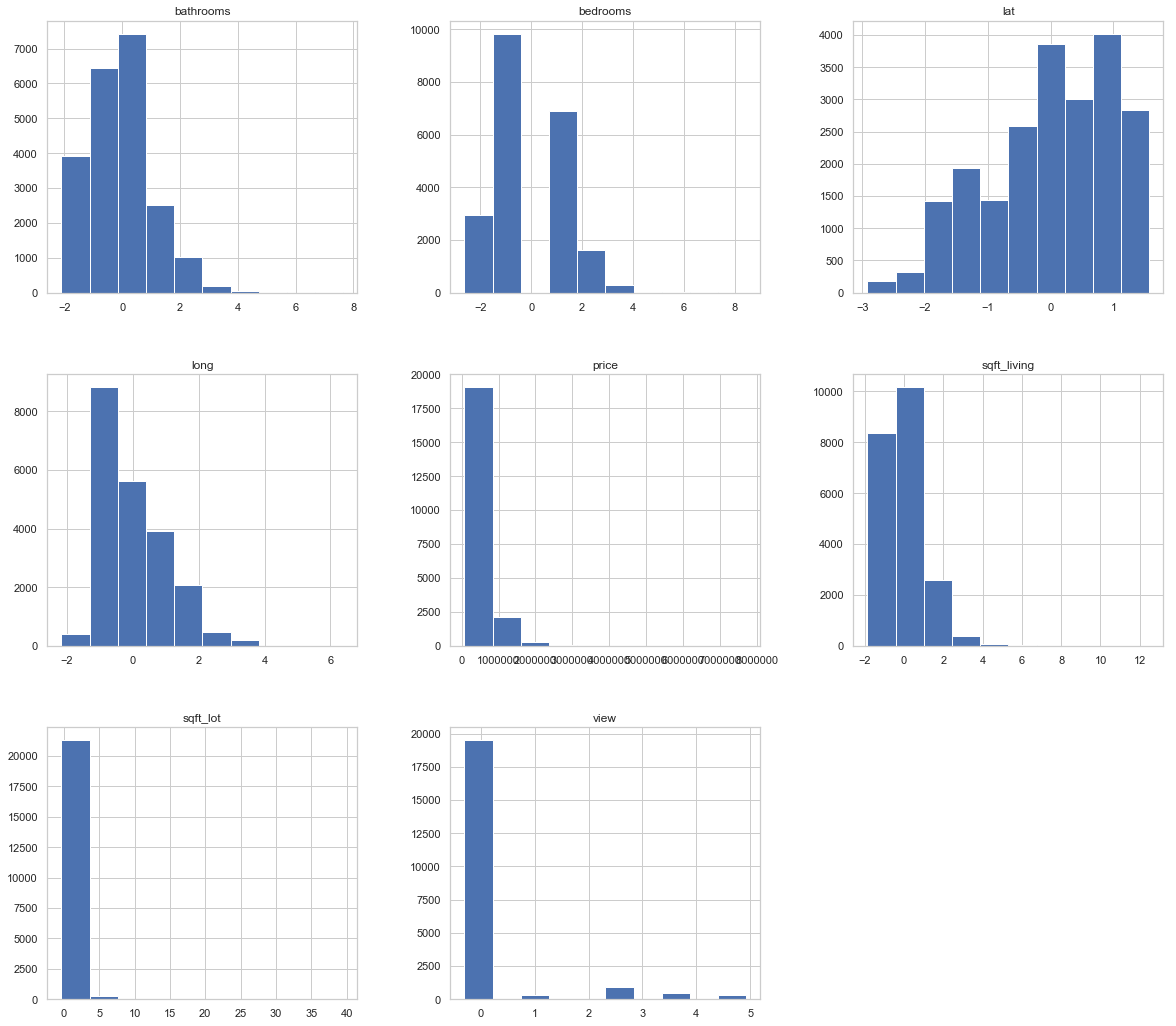

In [70]:
df.hist(figsize = (20,18));

In [71]:
np.log(df["price"]).describe()

count    21596.000000
mean        13.048196
std          0.526562
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

In [72]:
df["log_price"] = np.log(df["price"])

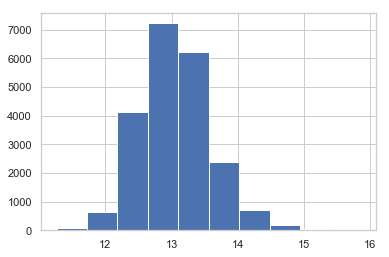

In [73]:
df["log_price"].hist();

In [74]:
col_names = df.describe().columns.drop(['price', 'log_price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Log_Price~" + val)
    print ("------------------------------")

    f = 'log_price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results_log[idx+1])

Housing: Log_Price~bedrooms
------------------------------
['bedrooms', 0.12311072078241947, 13.048196077480842, 0.18475570354072474, 0.0]
Housing: Log_Price~bathrooms
------------------------------
['bathrooms', 0.3038990541877734, 13.048196077480842, 0.29027831369058676, 0.0]
Housing: Log_Price~sqft_living
------------------------------
['sqft_living', 0.48331566140862225, 13.048196077480842, 0.3660710217393987, 0.0]
Housing: Log_Price~sqft_lot
------------------------------
['sqft_lot', 0.010006376255865534, 13.048196077480842, 0.05267303364253932, 3.7640723246861045e-49]
Housing: Log_Price~view
------------------------------
['view', 0.11879400367617665, 13.048196077480842, 0.18148769170017148, 0.0]
Housing: Log_Price~lat
------------------------------
['lat', 0.20144268317852643, 13.048196077480842, 0.23633370639550455, 0.0]
Housing: Log_Price~long
------------------------------
['long', 0.002589492424318607, 13.048196077480842, 0.026795214602815743, 7.288773353621172e-14]


In [75]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0998311,540292,116076,0
2,bathrooms,0.276587,540292,193209,0
3,sqft_living,0.492704,540292,257872,0
4,sqft_lot,0.00807828,540292,33019.5,5.5613e-40
5,view,0.154844,540292,144563,0
6,lat,0.0940571,540292,112670,0
7,long,0.000486077,540292,8099.6,0.00119461


While this made our price distribution more normal, it didn't change our r-sqaured values very much. Let's just continue with the regular price. 

In [76]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'yr_built', 'lat', 'long',
       ...
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199', 'log_price'],
      dtype='object', length=105)

In [77]:
df.columns[35:104] 

Index(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', '

In [79]:
df_final = df.drop(["floors_1.0","condition_1","grade_10", "zipcode_98002", "log_price", "date", "yr_built"], axis=1)
df_final.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,lat,long
count,2.159600e+04,2.159600e+04,2.159600e+04,2.159600e+04,21596.000000,2.159600e+04,2.159600e+04,2.159600e+04
mean,5.402920e+05,3.158553e-17,5.264254e-17,-1.842489e-17,0.000000,-1.052851e-17,2.072800e-17,9.212445e-18
std,3.673760e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.623374e+00,-2.101232e+00,-1.862871e+00,-0.352055,-3.049494e-01,-2.917218e+00,-2.167518e+00
25%,3.220000e+05,-4.112625e-01,-4.757401e-01,-7.083407e-01,-0.242912,-3.049494e-01,-6.422637e-01,-8.102562e-01
50%,4.500000e+05,-4.112625e-01,1.744566e-01,-1.855343e-01,-0.180637,-3.049494e-01,8.453792e-02,-1.209663e-01
75%,6.450000e+05,6.947930e-01,4.995549e-01,5.115407e-01,-0.106591,-3.049494e-01,8.510358e-01,6.322784e-01
max,7.700000e+06,8.437182e+00,7.651719e+00,1.248163e+01,39.510237,4.925938e+00,1.569898e+00,6.388204e+00


In [80]:
#feature ranking

y = df_final[["price"]] 
X = df_final.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,lat,long,floors_1.5,floors_2.0,floors_2.5,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.411263,-1.451035,-0.980636,-0.228182,-0.304949,-0.352842,-0.305724,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.411263,0.174457,0.533324,-0.189741,-0.304949,1.161388,-0.746301,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.517318,-1.451035,-1.427199,-0.123144,-0.304949,1.283364,-0.135178,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.694793,1.149752,-0.131075,-0.243877,-0.304949,-0.283554,-1.272151,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.411263,-0.150642,-0.436046,-0.169506,-0.304949,0.409325,1.200765,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
predictors_int = sm.add_constant(X)
model = sm.OLS(y, predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1105.
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:11:47   Log-Likelihood:            -2.8815e+05
No. Observations:               21596   AIC:                         5.765e+05
Df Residuals:                   21499   BIC:                         5.773e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.29e+17   2.84e+17     -0.455      0.649   -6.85e+17    4.27e+17
bedrooms       -1.273e+04   1408.780     -9.033      0.000   -1.55e+04   -9964.540
bathrooms       1.389e+04   1825.230      7.609      0.000    1.03e+04    1.75e+04
sqft_living     1.408e+05   2269.326     62.032      0.000    1.36e+05    1.45e+05
sqft_lot        8544.0097   1140.106      7.494      0.000    6309.317    1.08e+04
view            4.068e+04   1220.987     33.315      0.000    3.83e+04    4.31e+04
lat             3.076e+04   8272.271      3.719      0.000    1.45e+04     4.7e+04
long           -3.103e+04   6034.620     -5.142      0.000   -4.29e+04   -1.92e+04
floors_1.5      1.145e+04   3968.450      2.885      0.004    3671.546    1.92e+04
floors_2.0     -9731.4759   2967.139     -3.280      0.001   -1.55e+04   -3915.664
floors_2.5      7.623e+04   1.24e+04      6.144      0.000    5.19e+04    1.01e+05
floors_3.0     -6.466e+04   7116.848     -9.086      0.000   -7.86e+04   -5.07e+04
floors_3.5      1.282e+04   5.74e+04      0.223      0.823   -9.97e+04    1.25e+05
waterfront_0.0   1.29e+17   2.84e+17      0.455      0.649   -4.27e+17    6.85e+17
waterfront_1.0   1.29e+17   2.84e+17      0.455      0.649   -4.27e+17    6.85e+17
condition_2     7.675e+04   3.05e+04      2.513      0.012    1.69e+04    1.37e+05
condition_3     8.589e+04   2.84e+04      3.024      0.002    3.02e+04    1.42e+05
condition_4     1.093e+05   2.84e+04      3.844      0.000    5.36e+04    1.65e+05
condition_5     1.521e+05   2.86e+04      5.318      0.000     9.6e+04    2.08e+05
grade_11        2.063e+05   9022.195     22.866      0.000    1.89e+05    2.24e+05
grade_12        6.304e+05   1.73e+04     36.513      0.000    5.97e+05    6.64e+05
grade_13        1.732e+06   4.33e+04     40.041      0.000    1.65e+06    1.82e+06
grade_3        -8.182e+04   1.52e+05     -0.539      0.590   -3.79e+05    2.16e+05
grade_4        -1.968e+05   3.02e+04     -6.523      0.000   -2.56e+05   -1.38e+05
grade_5        -2.346e+05   1.22e+04    -19.224      0.000   -2.59e+05   -2.11e+05
grade_6        -2.382e+05   7665.108    -31.080      0.000   -2.53e+05   -2.23e+05
grade_7        -2.394e+05   6332.287    -37.811      0.000   -2.52e+05   -2.27e+05
grade_8        -2.133e+05   5710.998    -37.346      0.000   -2.24e+05   -2.02e+05
grade_9        -1.294e+05   5606.110    -23.078      0.000    -1.4e+05   -1.18e+05
zipcode_98001  -2.075e+04   1.36e+04     -1.524      0.128   -4.74e+04    5941.848
zipcode_98003  -3.614e+04   1.47e+04     -2.463      0.014   -6.49e+04   -7375.230
zipcode_98004   7.044e+05    2.3e+04     30.660      0.000    6.59e+05    7.49e+05
zipcode_98005   2.494e+05   2.43e+04     10.269      0.000    2.02e+05    2.97e+05
zipcode_98006   2.028e+05      2e+04     10.132      0.000    1.64e+05    2.42e+05
zipcode_9800

In [82]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.331015
dtype: float64
price    0.327996
dtype: float64
price    0.493088
dtype: float64
price    0.490801
dtype: float64
price    0.756638
dtype: float64
price    0.75554
dtype: float64
price    0.78598
dtype: float64
price    0.785014
dtype: float64
price    0.803382
dtype: float64
price    0.802495
dtype: float64
price    0.817807
dtype: float64
price    0.816985
dtype: float64
price    0.828508
dtype: float64
price    0.827734
dtype: float64
price    0.829159
dtype: float64
price    0.828388
dtype: float64
price    0.82991
dtype: float64
price    0.829143
dtype: float64


The difference between r-sq and adjusted r-sq is negligible, and seems to continue to be going up as we include more features. Remember though that we're likely overfitting when including 85 features. In order to identify this, let's rerun a similar experiment, but using a train test split!

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    9.031605e+10
dtype: float64
price    9.048511e+10
dtype: float64
price    6.710037e+10
dtype: float64
price    6.845495e+10
dtype: float64
price    4.077708e+10
dtype: float64
price    4.347539e+10
dtype: float64
price    2.829493e+10
dtype: float64
price    3.159044e+10
dtype: float64
price    2.592690e+10
dtype: float64
price    2.933608e+10
dtype: float64
price    2.397345e+10
dtype: float64
price    2.714515e+10
dtype: float64
price    2.241252e+10
dtype: float64
price    2.613233e+10
dtype: float64
price    2.229783e+10
dtype: float64
price    2.602935e+10
dtype: float64
price    2.211175e+10
dtype: float64
price    2.599579e+10
dtype: float64


What we see is that both MSE keeps improving when we add variables. It seems like a bigger model improves our performance, and the test and train performance don't really diverge.

In [84]:
# select 85 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-2.84324244e+10, -1.47546412e+30, -2.18578057e+10, -2.79919944e+10,
       -1.90756545e+10, -2.08850873e+10, -2.23786446e+10, -1.97003826e+10,
       -2.20352418e+10, -2.36356089e+10])

In [93]:
selected_columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'lat', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'waterfront_0.0',
       'waterfront_1.0', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98056', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zip

Our MSE is pretty low for each of the folds.

In [85]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [86]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    2.203772e+10
dtype: float64
Test Mean Squarred Error: price    2.594884e+10
dtype: float64


## Concluding Thoughts

The final R-squared value is 0.83. This means that 83% of the variability in home sales price is explained by my regression model. The coefficients that had the greatest impact on sales price are Waterfront, Grade, and Zipcode. Other notable variables are square footage, bedrooms/bathrooms, condition, and number of floors. 

We are accepting of this model because of the limited difference between the train MSE and the Test MSE!